In [1]:
import logging
import typing as t

import pandas as pd
import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import (
    GridSearchCV,
    RepeatedStratifiedKFold,
    train_test_split,
)
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

from ml.estimators import ESTIMATORS, RS
from ml.utils import load_cleaned_dataset, load_dataset, load_picked_dataset

logging.basicConfig(
    level=logging.DEBUG,
    filename="learn.log",
    filemode="a",
    format="%(asctime)s - p%(process)d: %(name)s - [%(levelname)s]: %(message)s",
)
import seaborn as sns

N_JOBS = 8
DATA_DESC = "raw"

In [2]:
import numpy as np


def make_ovo(
    est, params: dict[str, list[t.Any]]
) -> tuple[BaseEstimator, dict[str, list[t.Any]]]:
    params = {f"estimator__" + key: value for key, value in params.items()}

    return OneVsOneClassifier(estimator=est), params


ESTIMATORS = dict([make_ovo(k, v) for k, v in ESTIMATORS.items()])

if DATA_DESC == "cleaned":
    X, y = load_cleaned_dataset()
elif DATA_DESC == "picked":
    X, y = load_picked_dataset()
elif DATA_DESC == "raw":
    X, y = load_dataset()

X = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


run_results = []


for estimator in tqdm.tqdm(list(ESTIMATORS.keys())):
    X_train, y_train

    param_grid = ESTIMATORS[estimator]
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RS)
    grid = GridSearchCV(
        estimator, param_grid, scoring="f1_weighted", cv=cv, n_jobs=N_JOBS
    )
    grid.fit(X_train, y_train)

    y_pred = np.rint(grid.predict(X_test))

    run_result = (
        estimator,
        grid.best_params_,
        grid.best_score_,
        precision_score(y_test, y_pred, average="weighted"),
        recall_score(y_test, y_pred, average="weighted"),
        f1_score(y_test, y_pred, average="weighted"),
        accuracy_score(y_test, y_pred),
        y_pred,
    )

    run_results.append(run_result)
    logging.debug(run_result)

    means = grid.cv_results_["mean_test_score"]
    params = grid.cv_results_["params"]

    for mean, param in zip(means, params):
        logging.debug(f"{estimator}:{mean:.3f} with: {param}")

    pd.DataFrame(
        map(lambda x: x[:-1], run_results),
        columns=[
            "estimator",
            "params",
            "grid best score",
            "precision",
            "recall",
            "f1",
            "accuracy",
        ],
    ).sort_values("f1").to_csv(
        f"run_results_ovo_cont_reduced_features_new_data_{DATA_DESC}_f1+catboost.csv"
    )

  8%|▊         | 1/13 [00:01<00:15,  1.29s/it]/Users/emax/miniconda3/envs/cs/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/emax/miniconda3/envs/cs/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/emax/miniconda3/envs/cs/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Us

Learning rate set to 0.003967
Learning rate set to 0.003967
Learning rate set to 0.003967
Learning rate set to 0.003967
Learning rate set to 0.003983
Learning rate set to 0.003967
Learning rate set to 0.003967
Learning rate set to 0.003967
0:	learn: 0.6913001	total: 60ms	remaining: 59.9s
1:	learn: 0.6876381	total: 61.7ms	remaining: 30.8s
2:	learn: 0.6835190	total: 62.8ms	remaining: 20.9s
0:	learn: 0.6909919	total: 60.4ms	remaining: 1m
1:	learn: 0.6904464	total: 63.1ms	remaining: 31.5s
2:	learn: 0.6885522	total: 65.2ms	remaining: 21.7s
0:	learn: 0.6919036	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.6898969	total: 67.1ms	remaining: 33.5s
2:	learn: 0.6890170	total: 69.3ms	remaining: 23s
3:	learn: 0.6870329	total: 73.7ms	remaining: 18.4s
0:	learn: 0.6909082	total: 82.8ms	remaining: 1m 22s
0:	learn: 0.6913257	total: 112ms	remaining: 1m 52s
3:	learn: 0.6798822	total: 102ms	remaining: 25.4s
1:	learn: 0.6898777	total: 114ms	remaining: 57.1s
4:	learn: 0.6796725	total: 105ms	remaining: 20.9s
3:	l

 92%|█████████▏| 12/13 [01:22<00:13, 13.56s/it]

985:	learn: 0.3977532	total: 1.67s	remaining: 23.6ms
986:	learn: 0.3975709	total: 1.67s	remaining: 21.9ms
987:	learn: 0.3974089	total: 1.67s	remaining: 20.3ms
988:	learn: 0.3972921	total: 1.67s	remaining: 18.6ms
989:	learn: 0.3972921	total: 1.67s	remaining: 16.9ms
990:	learn: 0.3972921	total: 1.67s	remaining: 15.2ms
991:	learn: 0.3972921	total: 1.67s	remaining: 13.5ms
992:	learn: 0.3967831	total: 1.68s	remaining: 11.8ms
993:	learn: 0.3965333	total: 1.68s	remaining: 10.1ms
994:	learn: 0.3963877	total: 1.68s	remaining: 8.44ms
995:	learn: 0.3959971	total: 1.68s	remaining: 6.75ms
996:	learn: 0.3959971	total: 1.68s	remaining: 5.06ms
997:	learn: 0.3959884	total: 1.68s	remaining: 3.37ms
998:	learn: 0.3959884	total: 1.68s	remaining: 1.69ms
999:	learn: 0.3959152	total: 1.69s	remaining: 0us
0:	learn: 0.6915042	total: 758us	remaining: 758ms
1:	learn: 0.6899592	total: 1.6ms	remaining: 801ms
2:	learn: 0.6885072	total: 2.47ms	remaining: 820ms
3:	learn: 0.6868392	total: 3.6ms	remaining: 896ms
4:	lear

100%|██████████| 13/13 [01:53<00:00,  8.76s/it]


0 0 OneVsOneClassifier(estimator=LogisticRegression(random_state=42))
0 1 OneVsOneClassifier(estimator=RidgeClassifier(random_state=42))
0 2 OneVsOneClassifier(estimator=GaussianProcessClassifier(random_state=42))
0 3 OneVsOneClassifier(estimator=DecisionTreeClassifier(random_state=42))
1 0 OneVsOneClassifier(estimator=SVC())
1 1 OneVsOneClassifier(estimator=AdaBoostClassifier(random_state=42))
1 2 OneVsOneClassifier(estimator=RandomForestClassifier(random_state=42))
1 3 OneVsOneClassifier(estimator=BaggingClassifier(random_state=42))
2 0 OneVsOneClassifier(estimator=GradientBoostingClassifier(random_state=42))
2 1 OneVsOneClassifier(estimator=KNeighborsClassifier())
2 2 OneVsOneClassifier(estimator=RadiusNeighborsClassifier())
2 3 OneVsOneClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x14967d5d0>)
3 0 OneVsOneClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x14967d690>)


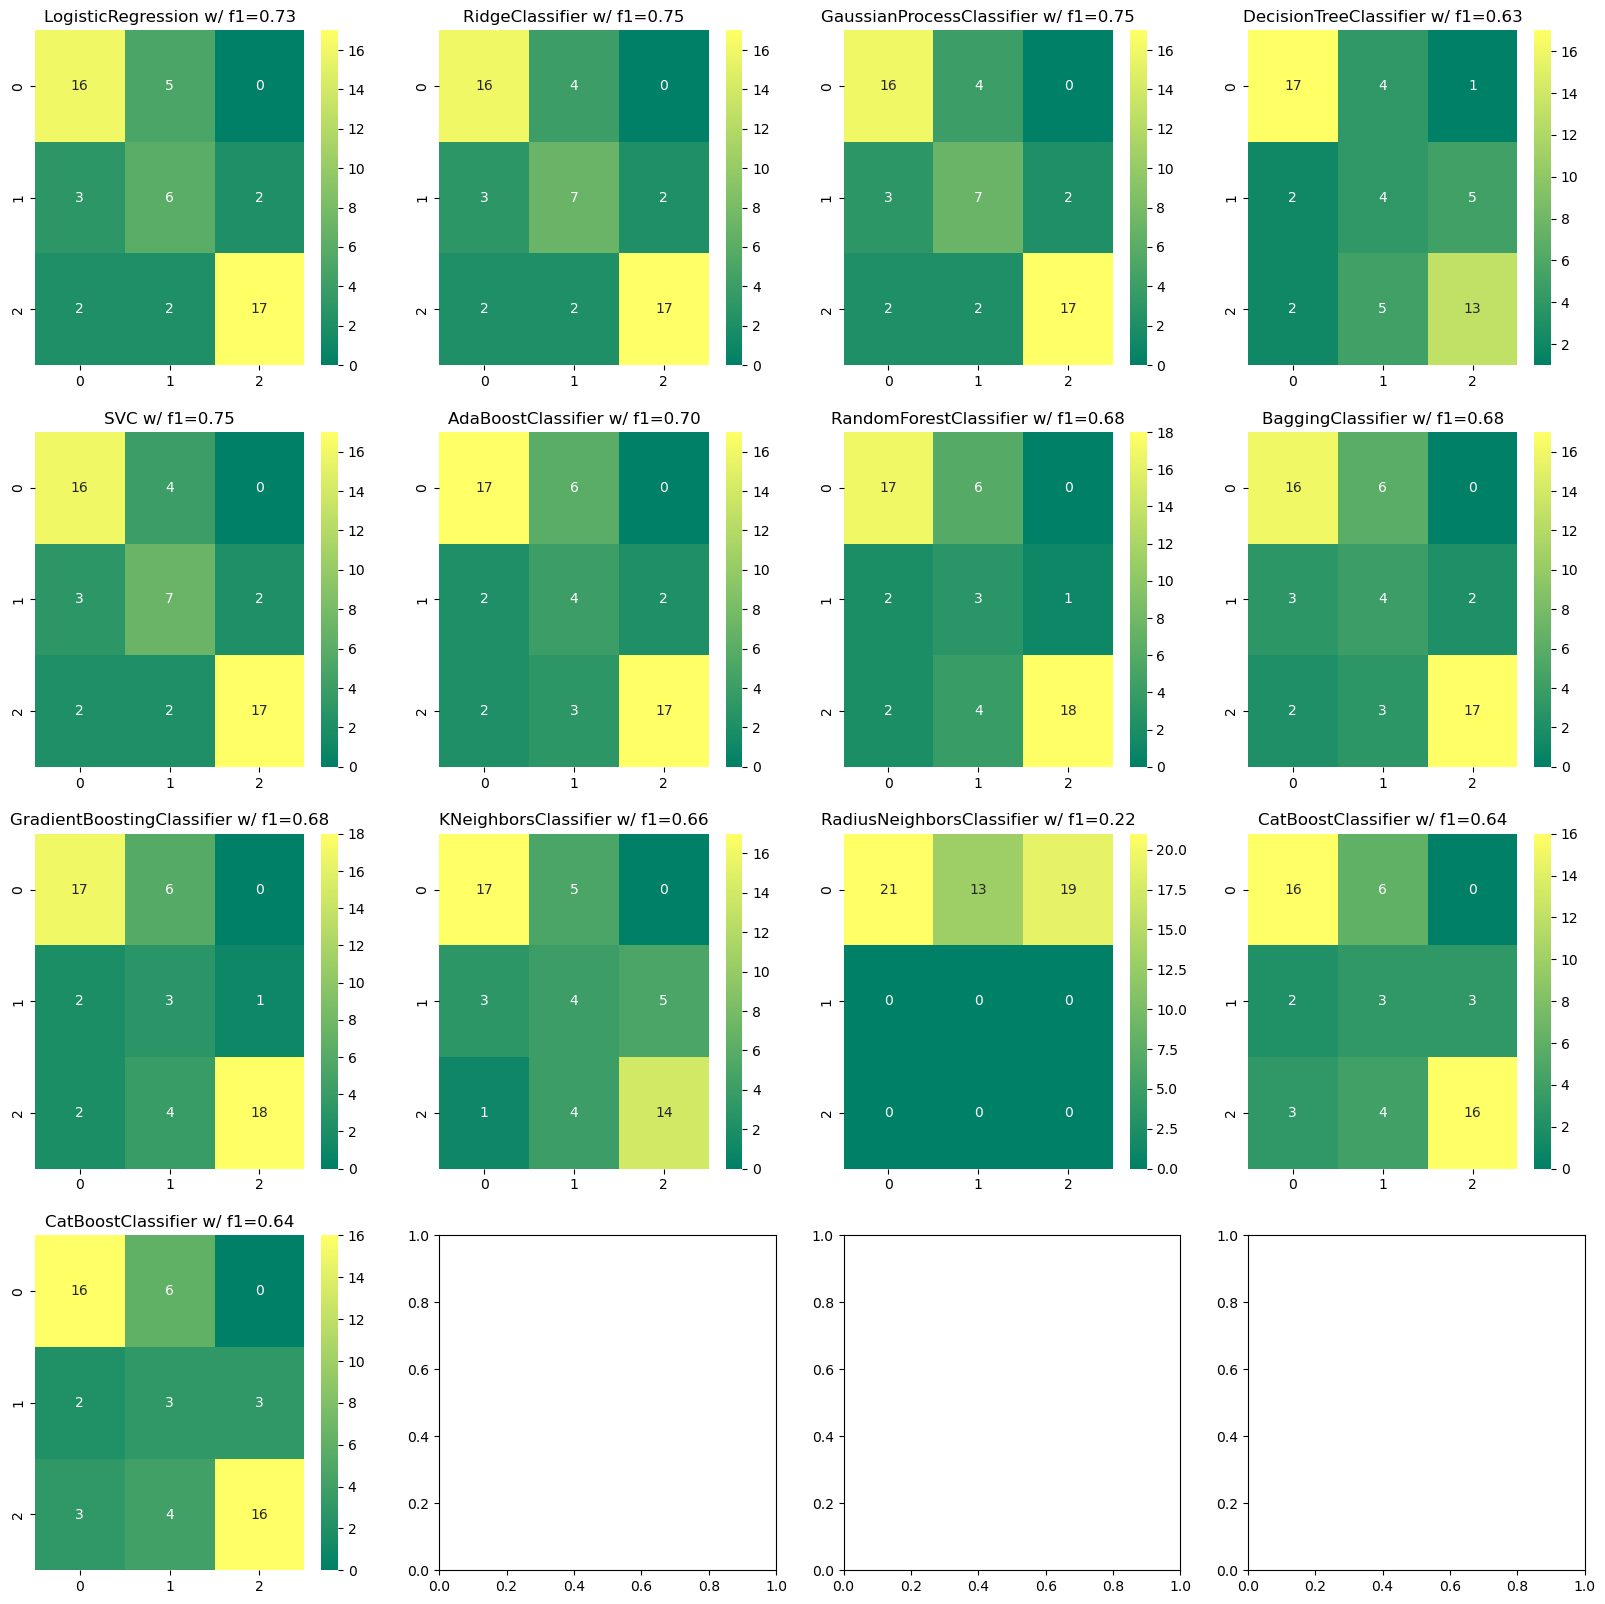

In [3]:
import itertools
from matplotlib import pyplot as plt


fig, axs = plt.subplots(4, 4)
fig.set_size_inches(20, 20)

for (i1, i2), (est, _, _, _, _, f1, _, y_pred) in zip(itertools.product([0, 1, 2, 3], [0, 1, 2, 3]), run_results):
    print(i1, i2, est)
    axs[i1, i2].set_title(f"{type(est.estimator).__name__} w/ {f1=:.2f}")

    # true (rows), predicted (columns)
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="summer", ax=axs[i1, i2])